# **Challenge: Feedback analysis**

In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

**IMDB Data**

First we will build a Naive Bayes Classifier for text classification of IMDB movie reviews.

In [65]:
imdb_raw = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
imdb_raw.columns = ['text', 'sentiment']

In [66]:
keywords = ['good', 'crap', 'fun', 'pure', 'brilliance', 'doomed', 'lame', 'unfunny', 'generic', 'not', 'predictable', 'lazy', 
            'lovely', 'boasts', 'love', 'long', 'pointless', 'negative', 'insipid', 'excellent', 'convincing', 'riveting',
            'badly', 'especially', 'great', 'true', 'classic', 'terrific', 'funny', 'touching', 'disappointing', 'joy', 'weaker',
            'rocked', 'terrible', 'boring', 'worst', 'no', 'stupid', 'torture', 'drag', 'genius', 'lacks', 'uninteresting',
            'unremarkable', 'bore', 'waste', 'unfortunately', 'bad', 'sucked', 'superbly', 'awesome', 'worth']

for key in keywords:
    imdb_raw[str(key)] = imdb_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

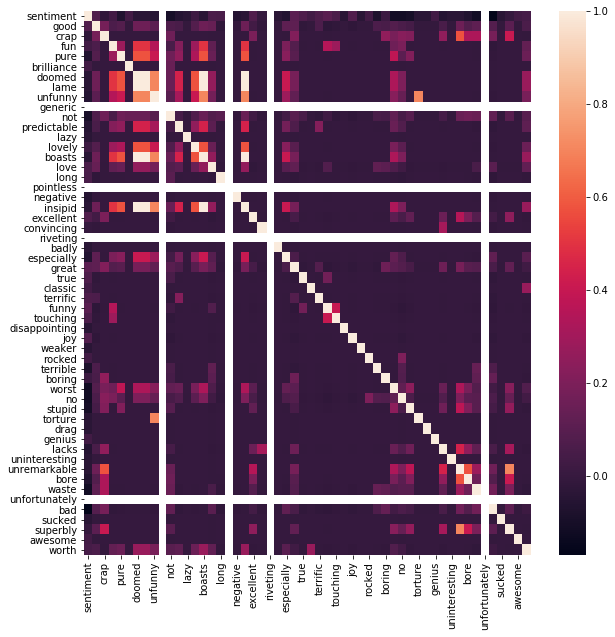

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(imdb_raw.corr())

In [68]:
data = imdb_raw[keywords]
target = imdb_raw['sentiment']

In [69]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 272


Now let's test our classifier on another dataset containing Yelp data.

**Yelp Data**

In [70]:
yelp_raw = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
yelp_raw.columns = ['text', 'sentiment']

In [71]:
for key in keywords:
    yelp_raw[str(key)] = yelp_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

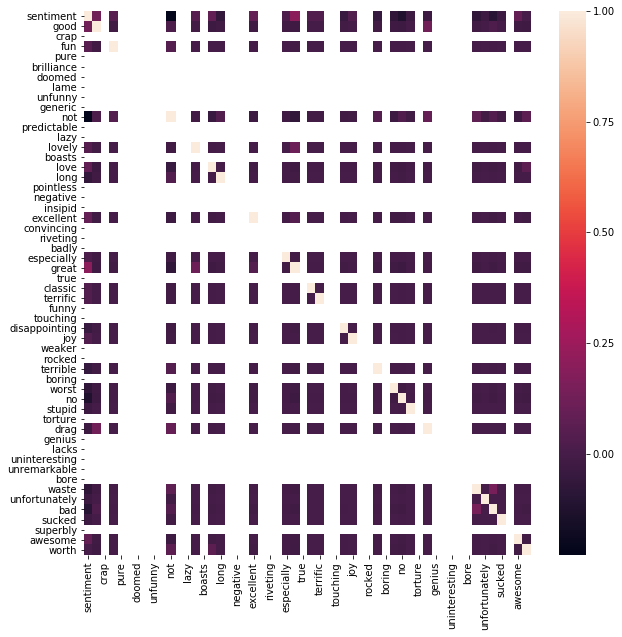

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(yelp_raw.corr())

In [73]:
data = yelp_raw[keywords]
target = yelp_raw['sentiment']

In [74]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 390
